# Projeto 2 - Nanodegree Fundamentos de Data Science I

##### Luciane Carneiro - 2019

Estudo do conjunto de dados demográficos e informações de 891 dos 2.224 passageiros e tripulantes a bordo do Titanic. Serão descritas todas as etapas realizadas na análise do conjunto de dados.

### Importar bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Carregar conjunto de dados e exibir amostra de registros e informações gerais sobre os dados:

In [2]:
df_titanic = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59e4fe3d_titanic-data-6/titanic-data-6.csv")

#Amostra dos registros
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Importante consultar a referência para entender o que cada coluna quer dizer. Segue:

|    Coluna   |                            Significado                            |
|-------------|-------------------------------------------------------------------|
| Survived    | Indica se sobreviveu ou não ao naufrágio. 0 = Não, 1 = Sim        |
| Pclass      | Classe da passagem. 1 = primeira, 2 = segunda, 3 = terceira       |
| Name        | Nome do passageiro/tripulante                                     | 
| Sex         | Sexo do passageiro/tripulante                                     |
| Age         | Idade do passageiro/tripulante                                    |
| SibSp       | Número de irmãos/cônjuges a bordo do navio                        |
| Parch       | Número de pais/crianças a bordo do navio                          |
| Ticket      | Número da passagem                                                |
| Fare        | Valor da passagem                                                 |
| Cabin       | Número da cabine no navio                                         |
| Embarked    | Porto de Embarque. C = Cherbourg, Q = Queenstown, S = Southampton |

In [3]:
#Informações como contagem, média, mediana, valores mínimo e máximo, entre outros
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#Informações sobre tipos de dados
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
#Testar se PassengerId possui somente valores únicos
print("Registros duplicados de PassengerId: {0}".format(sum(df_titanic['PassengerId'].duplicated())))

Registros duplicados de PassengerId: 0


In [6]:
#Colocar PassengerId como index, por se tratar de um identificador
df_titanic.set_index('PassengerId', inplace=True)

In [7]:
#Encontrar duplicatas
print("Registros duplicados: {0}".format(sum(df_titanic.duplicated())))

df_titanic.head()

Registros duplicados: 0


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Com a análise realizada pelos comandos executados até agora, é possível identificar que há 891 registros, porém não há em todos os registros as informações de Idade, Número da Cabine e de Porto de Embarque. Além disso, é possível identificar que os dados que contem números estão devidamente tipificados, e que não há registros duplicados.

### Com os dados analisados, foram escolhidas as seguintes perguntas:

1) Dentre os relacionados, quantos sobreviveram e quantos não?

2) Qual relação faixa etária/sexo/classe teve mais passageiros/tripulantes que não sobreviveram?

### Limpeza dos dados, considerando somente as variáveis para responder às perguntas:

In [8]:
#Eliminando colunas desnecessárias para as perguntas propostas
df_titanic_clean = df_titanic.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

In [9]:
#Alterando o tipo de dado e o seu conteúdo para facilitar a legenda
df_titanic_clean['Survived'] = df_titanic_clean['Survived'].astype(str)
df_titanic_clean['Survived'] = df_titanic_clean['Survived'].replace('0', 'Não').replace('1', 'Sim')
df_titanic_clean['Sex'] = df_titanic_clean['Sex'].replace('female', 'Mulher').replace('male', 'Homem')

#Alterando os nomes das colunas
df_titanic_clean.columns = ['Sobrevivente', 'Classe', 'Sexo', 'Idade']

df_titanic_clean.head()

,Sobrevivente,Classe,Sexo,Idade
PassengerId,,,,
1,Não,3,Homem,22.0
2,Sim,1,Mulher,38.0
3,Sim,3,Mulher,26.0
4,Sim,1,Mulher,35.0
5,Não,3,Homem,35.0


Com isso, a tabela já está mais limpa e organizada. A seguir, serão verificados os valores faltantes.

In [10]:
#Contagem de valores faltantes
df_titanic_clean.isnull().sum()

Sobrevivente      0
Classe            0
Sexo              0
Idade           177
dtype: int64

In [11]:
#Como são poucos registros dentro do total apresentado, vamos eliminar os que estão com valor faltando
df_titanic_clean.dropna(inplace=True, how='any')

#Nova contagem de registros
print("Passageiros e tripulantes com registro completo para a análise: {0}".format(df_titanic_clean.shape[0]))

Passageiros e tripulantes com registro completo para a análise: 714


### 1) Dentre os relacionados, quantos sobreviveram e quantos não?

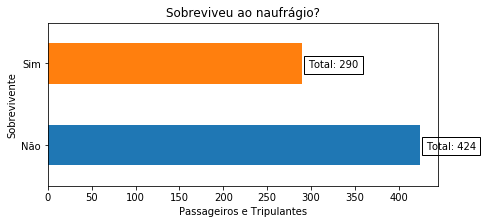

In [12]:
#Gráfico de quantidades
grafico = df_titanic_clean['Sobrevivente'].value_counts().plot(kind='barh', 
                                                               title='Sobreviveu ao naufrágio?', figsize=(7,3));
plt.xlabel('Passageiros e Tripulantes');
plt.ylabel('Sobrevivente');

for item in grafico.patches:
    value = item.get_width()
    grafico.text(item.get_width() + 7, item.get_y() + .2, "Total: {0}".format(value), bbox=dict(fill=False))

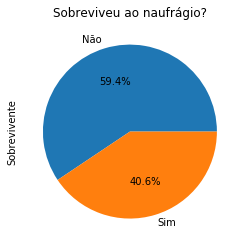

In [13]:
#Gráfico de porcentagem
df_titanic_clean['Sobrevivente'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', 
                                                     title='Sobreviveu ao naufrágio?');

Com os dois gráficos podemos observar que a maior parte dos passageiros e tripulantes não sobreviveram ao naufrágio. Dos 714 analisados, 424 não sobreviveram (59,38%), enquanto 290 sobreviveram (40,62%).

### 2) Qual relação faixa etária/sexo/classe teve mais passageiros/tripulantes que não sobreviveram?

Vamos separar esta pergunta em 3 análises: 

Análise por fáixa etária;

Análise por sexo; e 

Análise por classe.

Após, será feita a análise dos não sobreviventes, agrupando as três variáveis.

In [14]:
#Criar filtro para sobreviventes e não sobreviventes, se necessário
filtro_sobrevivente_nao = df_titanic_clean['Sobrevivente'] == 'Não'
filtro_sobrevivente_sim = df_titanic_clean['Sobrevivente'] == 'Sim'

In [15]:
#Função para cálculo de percentual
def calcular_percentual(valor, total):
    """Função que calcula o percentual de um valor em relação ao seu total.
    
    Arguments:
        valor {int} -- valor sobre o qual será calculada a porcentagem.
        total {int} -- valor total do conjunto
        
    Returns:
        float -- O valor do percentual, com aproximação de duas casas decimais.
    """
    return round((valor / total) * 100, 2)

In [16]:
#Função para gerar os gráficos das análises
def gerar_grafico_barh(df, group_by, y_label, title_g, size_g):
    """Função que gera uma tabela e um gráfico com as quantidades e proporções de coluna(s) específica(s), 
    agrupando os dados por outra coluna.
    
    Arguments:
        df {pandas.DataFrame} -- dataframe contendo os dados que serão processados.
        group_by {list} -- lista com o(s) nome(s) da(s) coluna(s) sobre a(s) qual(is) os dados serão 
                            agrupados e, por último, o nome da coluna a ser considerada para exibição.
        y_label {string} -- rótulo da coluna que será exibida no gráfico.
        title_g {string} -- título do gráfico.
        size_g {tuple} -- tamanho da imagem do gráfico.
    
    Returns:
        Uma tabela com os dados agrupados e sua proporção.
        Um gráfico do tipo barh com as quantidades agrupadas.
    """
    #Criar novo df com os totais e os rótulos
    group_by.append('Sobrevivente')
    passageiros = df.groupby(group_by)[group_by[-1]].count().to_frame(name = 'Total').reset_index()    
    group_by.remove('Sobrevivente')
    
    #Agrupar rótulos em uma coluna
    #Concatenar conteúdo das colunas no formato: (col1, ...,  colN). Ex.: (1, Homem, 15-24)    
    for column in group_by:
        passageiros[column] = passageiros[column].astype(str)
    
    if len(group_by) == 1:
        passageiros['Rotulo'] = '(' + passageiros[group_by[0]] + ')'
    elif len(group_by) > 1:
        passageiros['Rotulo'] = '(' + passageiros[group_by[0]].str.cat(passageiros[group_by[1]],sep=", ")
        for column in group_by[2:]:
            passageiros['Rotulo'] = passageiros['Rotulo'].str.cat(passageiros[column],sep=", ")
        passageiros['Rotulo'] += ')'
        
    passageiros = passageiros[['Rotulo', 'Sobrevivente', 'Total']]
    
    #Adicionar percentual sobre todos os dados
    passageiros['%'] = calcular_percentual(passageiros['Total'], len(df_titanic_clean['Sobrevivente']))
    
    #Exibir dados
    print(passageiros)
    
    #Criar gráfico sobre df
    passageiros.groupby(['Rotulo', 'Sobrevivente'])['Total'].sum().sort_values().unstack().plot(
        kind='barh', stacked=True, title=title_g, figsize=size_g)
    grafico = plt.gca()
    grafico.invert_yaxis()
    grafico.set_xlabel("Passageiros e Tripulantes")
    grafico.set_ylabel(y_label)
    
    for item in grafico.patches:
        percent = calcular_percentual(item.get_width(), len(df_titanic_clean['Sobrevivente']))
        #Como a análise será feita sobre os dados maiores, e por questões de escala, 
        #serão desconsideradas das exibições no gráfico as proporções abaixo de 0.02
        if percent > 2:
            plt.gca().text((0.5 * item.get_width()) + item.get_x(), 0.5 * item.get_height() + item.get_y(),
                           "{0}%".format(percent), fontsize=12, rotation=45, ha='center', va='center')
    
    plt.show()

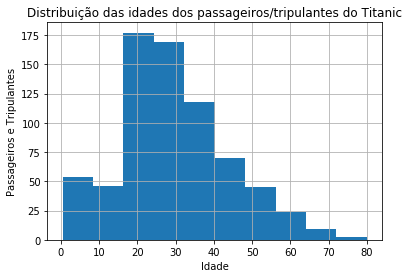

In [17]:
#Análise por faixa etária
#Distribuição das idades
df_titanic_clean['Idade'].hist();

plt.title("Distribuição das idades dos passageiros/tripulantes do Titanic")
plt.ylabel("Passageiros e Tripulantes")
plt.xlabel("Idade")

plt.show()

Aqui podemos já podemos observar que a maior parte dos passageiros e tripulantes tinham em torno de 20 a 40 anos. 

Contudo, para facilitar o entendimento da análise desta variável, vamos separar os dados por faixa etária. A informação de faixa etária é feita da seguinte forma: 0-14 anos (crianças), 15-24 anos (idade de trabalho precoce), 25-54 anos (idade máxima de trabalho), 55-64 anos (idade de trabalho madura), 65 anos e mais (idosos). (The World Factbook, 2019)

In [18]:
#Adicionando coluna de faixa etária
#Informação de idade máxima entre os registros (80 anos) foi obtida na análise inicial dos dados
bin_edges = [0, 14.99, 24.99, 54.99, 64.99, 80.99]
bin_names = ['0-14', '15-24', '25-54', '55-64', '65+']
df_titanic_clean['Faixa_Etaria'] = pd.cut(df_titanic_clean['Idade'], bin_edges, labels=bin_names)

#Com a faixa etária, a idade não é mais necessária
df_titanic_clean.drop('Idade', axis=1, inplace=True)

    Rotulo Sobrevivente  Total      %
0   (0-14)          Não     33   4.62
1   (0-14)          Sim     45   6.30
2  (15-24)          Não    127  17.79
3  (15-24)          Sim     73  10.22
4  (25-54)          Não    235  32.91
5  (25-54)          Sim    159  22.27
6  (55-64)          Não     19   2.66
7  (55-64)          Sim     12   1.68
8    (65+)          Não     10   1.40
9    (65+)          Sim      1   0.14


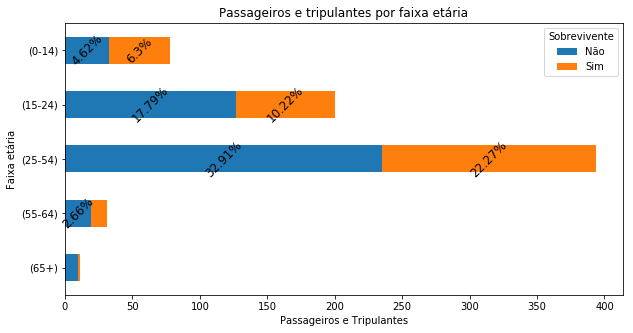

In [19]:
#Nova análise por faixa etária
gerar_grafico_barh(df_titanic_clean, ['Faixa_Etaria'], 'Faixa etária', 'Passageiros e tripulantes por faixa etária', (10,5))

Aqui já possível identificar que a maior parte dos passageiros e tripulantes a bordo tinham entre 25 e 54 anos. Além disso, destes, a maior parte não sobreviveu ao naufrágio (235, ou 32,91%).

     Rotulo Sobrevivente  Total      %
0   (Homem)          Não    360  50.42
1   (Homem)          Sim     93  13.03
2  (Mulher)          Não     64   8.96
3  (Mulher)          Sim    197  27.59


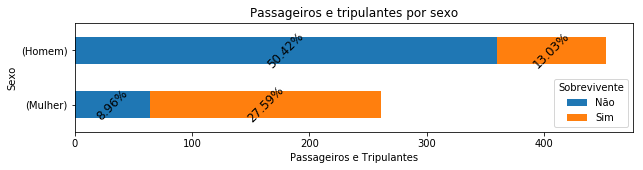

In [20]:
#Análise por sexo
gerar_grafico_barh(df_titanic_clean, ['Sexo'], 'Sexo', 'Passageiros e tripulantes por sexo', (10,2))

Aqui identificamos que a maior parte dos passageiros e tripulantes a bordo eram do sexo masculino. Além disso, destes, a maior parte não sobreviveu ao naufrágio (360, ou 50,42%).

  Rotulo Sobrevivente  Total      %
0    (1)          Não     64   8.96
1    (1)          Sim    122  17.09
2    (2)          Não     90  12.61
3    (2)          Sim     83  11.62
4    (3)          Não    270  37.82
5    (3)          Sim     85  11.90


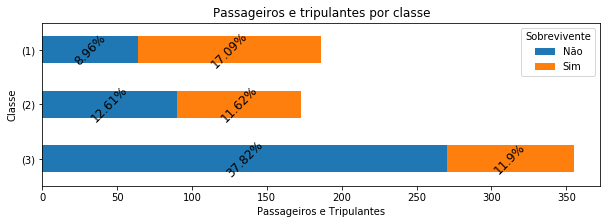

In [21]:
#Análise por classe
gerar_grafico_barh(df_titanic_clean, ['Classe'], 'Classe', 'Passageiros e tripulantes por classe', (10,3))

Nesta análise é possível identificar que a maior parte dos passageiros e tripulantes a bordo estava acomodada na terceira classe. Além disso, destes, também a maior parte não sobreviveu ao naufrágio (270, ou 37,82%).

                Rotulo Sobrevivente  Total      %
0     (1, Homem, 0-14)          Sim      3   0.42
1    (1, Homem, 15-24)          Não      7   0.98
2    (1, Homem, 15-24)          Sim      2   0.28
3    (1, Homem, 25-54)          Não     37   5.18
4    (1, Homem, 25-54)          Sim     32   4.48
5    (1, Homem, 55-64)          Não     12   1.68
6    (1, Homem, 55-64)          Sim      2   0.28
7      (1, Homem, 65+)          Não      5   0.70
8      (1, Homem, 65+)          Sim      1   0.14
9    (1, Mulher, 0-14)          Não      1   0.14
10   (1, Mulher, 0-14)          Sim      1   0.14
11  (1, Mulher, 15-24)          Sim     25   3.50
12  (1, Mulher, 25-54)          Não      2   0.28
13  (1, Mulher, 25-54)          Sim     49   6.86
14  (1, Mulher, 55-64)          Sim      7   0.98
15    (2, Homem, 0-14)          Sim      9   1.26
16   (2, Homem, 15-24)          Não     21   2.94
17   (2, Homem, 15-24)          Sim      1   0.14
18   (2, Homem, 25-54)          Não     58   8.12


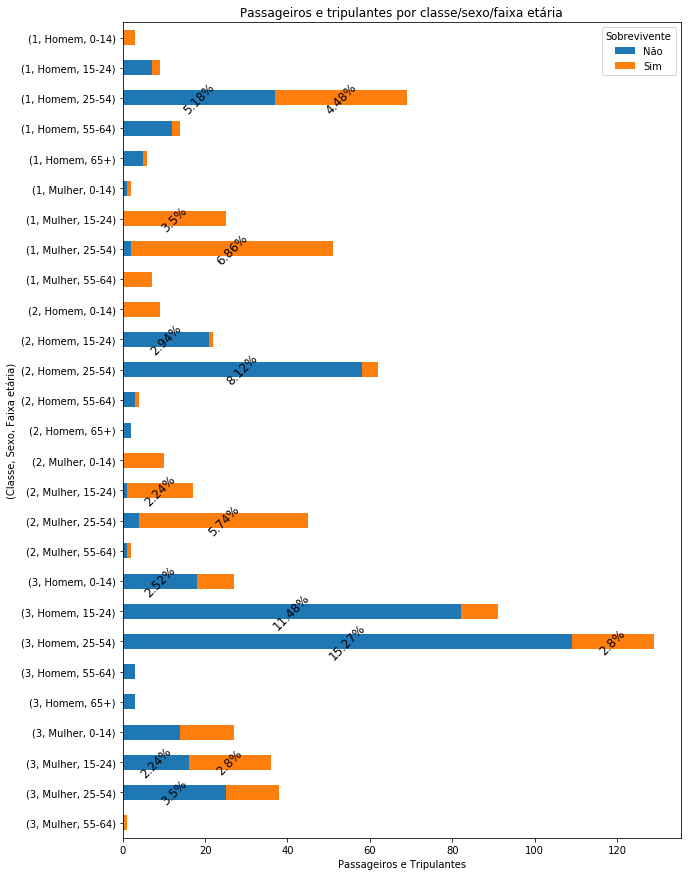

In [22]:
#Análise das 3 características agrupadas
gerar_grafico_barh(df_titanic_clean,['Classe', 'Sexo', 'Faixa_Etaria'], '(Classe, Sexo, Faixa etária)', 
                   'Passageiros e tripulantes por classe/sexo/faixa etária', (10,15))

A partir dos dados deste gráfico, vamos comparar os três grupos de maior quantidade de não sobreviventes com o total de passageiros/tripulantes que possuem os dados completos no registro, para se ter uma ideia da proporção.

In [23]:
total_passageiros = len(df_titanic_clean)
total_nao_sobreviventes = len(df_titanic_clean[df_titanic_clean['Sobrevivente'] == 'Não'])
total_sobreviventes = len(df_titanic_clean[df_titanic_clean['Sobrevivente'] == 'Sim'])
total_classe3_homem_2554 = len(df_titanic_clean.query("Classe == '3' & Sexo == 'Homem' & Faixa_Etaria == '25-54'"))
total_classe3_homem_1524 = len(df_titanic_clean.query("Classe == '3' & Sexo == 'Homem' & Faixa_Etaria == '15-24'"))
total_classe2_homem_2554 = len(df_titanic_clean.query("Classe == '2' & Sexo == 'Homem' & Faixa_Etaria == '25-54'"))

print("Total de passageiros e tripulantes considerados: {0}".format(total_passageiros))
print("Total de passageiros e tripulantes sobreviventes: {0}".format(total_sobreviventes))
print("Total de passageiros e tripulantes não sobreviventes: {0}".format(total_nao_sobreviventes))
print("Total de terceira classe, homem, faixa etária 25 a 54 anos: {0}, {1}%".format(total_classe3_homem_2554, 
       calcular_percentual(total_classe3_homem_2554, len(df_titanic_clean['Sobrevivente']))))
print("Total de terceira classe, homem, faixa etária 15 a 24 anos: {0}, {1}%".format(total_classe3_homem_1524, 
       calcular_percentual(total_classe3_homem_1524, len(df_titanic_clean['Sobrevivente']))))
print("Total de segunda classe, homem, faixa etária 25 a 54 anos: {0}, {1}%".format(total_classe2_homem_2554, 
       calcular_percentual(total_classe2_homem_2554, len(df_titanic_clean['Sobrevivente']))))

Total de passageiros e tripulantes considerados: 714
Total de passageiros e tripulantes sobreviventes: 290
Total de passageiros e tripulantes não sobreviventes: 424
Total de terceira classe, homem, faixa etária 25 a 54 anos: 129, 18.07%
Total de terceira classe, homem, faixa etária 15 a 24 anos: 91, 12.75%
Total de segunda classe, homem, faixa etária 25 a 54 anos: 62, 8.68%


Nesta análise é possível verificar que o grupo que teve mais passageiros e tripulantes que não sobreveviveram também é o que possuía mais pessoas à bordo (homens da terceira e segunda classe, com idade entre 15 e 54 anos). Isso corrobora a informação apresentada nas três análises iniciais desta pergunta.

### Conclusões

A análise dos registros que possuíam todos os dados a serem analisados, num total de 714 passageiros e tripulantes a bordo do navio, mostrou que 424 (59,38%) deles não sobreviveram ao desastre, enquanto 290 (40,62%) sobreviveram. Ainda, que a maior parte eram homens (63,45%), de faixa etária de 25 a 54 anos (55,18%), acomodados na terceira classe (49,72%).

A análise das características dos não sobreviventes mostra que a maior parte eram homens da terceira e segunda classe, com idade entre 15 e 54 anos. Considerando o número total de passageiros e tripulantes analisados, tratam-se de 34,87%. Como também são as características que mais possuíam passageiros e tripulantes a bordo do navio (39,50%), a análise é inconclusiva para entender, por exemplo, se essas características foram determinantes para não terem sobrevivido ao desastre.


### Referências

Dados extraídos de: https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59e4fe3d_titanic-data-6/titanic-data-6.csv

https://www.kaggle.com/c/titanic/data

https://paulovasconcellos.com.br/o-que-o-naufr%C3%A1gio-do-titanic-nos-ensina-at%C3%A9-hoje-data-science-project-2fea8ff1c9b5

https://www.cia.gov/library/publications/the-world-factbook/fields/341.html